In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts

In [21]:
df=pd.read_csv('handwritten_data_785.csv')

In [22]:
df.shape

(372037, 785)

In [23]:
data_array = np.array(df,dtype=np.uint8)
del df

In [24]:
data_array.shape

(372037, 785)

In [25]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [26]:
labels = data_array[:,0]
x = data_array[:,1:].reshape(372037,28,28)/255.
del data_array
unique, counts = np.unique(labels, return_counts=True)
list_alpha = list(zip(alpha, counts))
for i in list_alpha:
    print(i[0],' : ',i[1])

A  :  14780
B  :  8977
C  :  23555
D  :  10599
E  :  11493
F  :  1164
G  :  5795
H  :  7265
I  :  1118
J  :  8615
K  :  5621
L  :  11641
M  :  12454
N  :  19093
O  :  58154
P  :  19378
Q  :  5890
R  :  11669
S  :  48463
T  :  22668
U  :  29117
V  :  340
W  :  10884
X  :  6298
Y  :  10909
Z  :  6097


<BarContainer object of 26 artists>

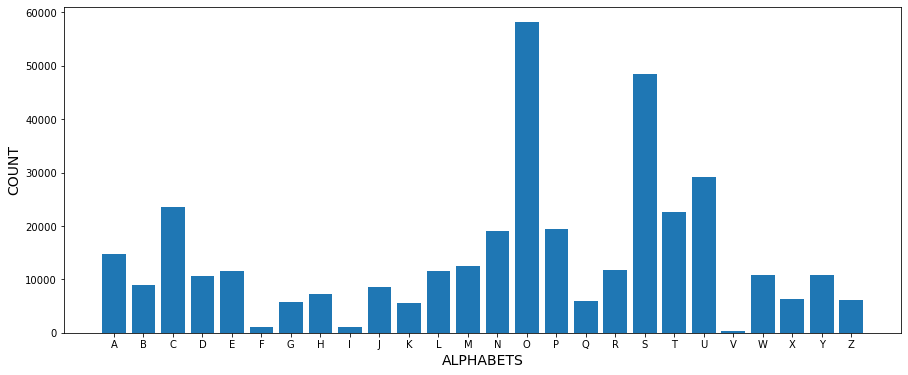

In [27]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('ALPHABETS',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.bar(alpha,counts)

In [28]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

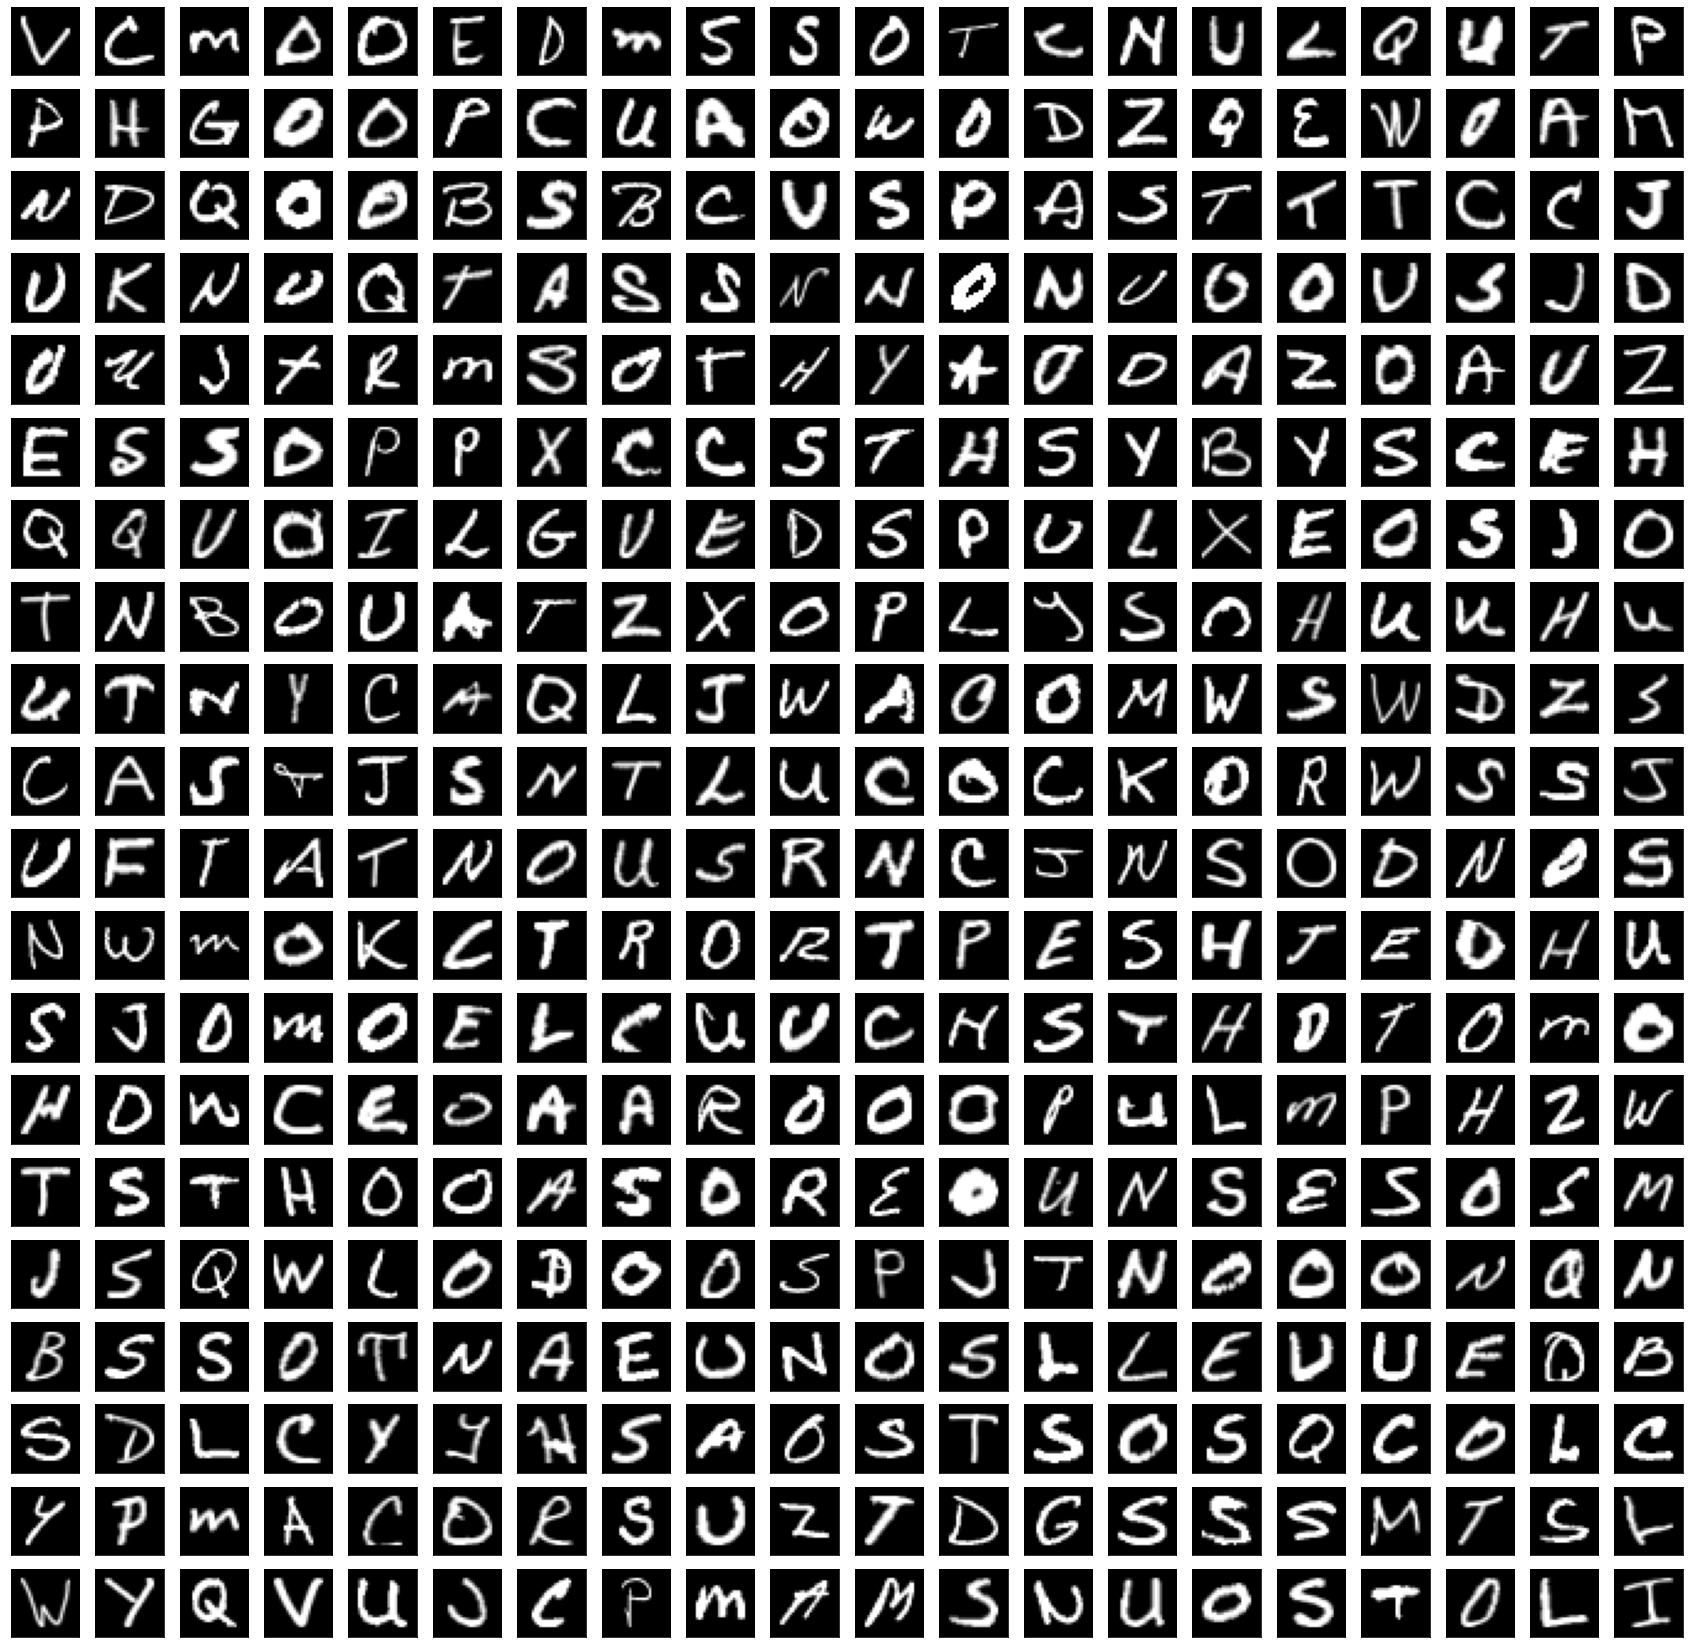

In [29]:
a=np.random.randint(low=0,high=372036,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i],cmap='gray')
    c+=1
del a    

In [30]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

In [31]:
alphabets[1]

'B'

In [32]:
del c, list_alpha, counts, unique

In [35]:
x=x.reshape(372037,28,28,1)
x_train,x_test,y_train,y_test = tts(x,labels,test_size=0.01)
del x  # memory issues
del labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(368316, 28, 28, 1)
(3721, 28, 28, 1)
(368316,)
(3721,)


In [36]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adadelta
from keras.optimizers import SGD

In [37]:
model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                          

C:\Users\ADMIN\anaconda3\New folder\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [38]:
history = model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=5)

Epoch 1/5
10359/10359 [==============================] - 1744s 167ms/step - loss: 0.1816 - accuracy: 0.9507 - val_loss: 0.0812 - val_accuracy: 0.9786
Epoch 2/5
10359/10359 [==============================] - 1728s 167ms/step - loss: 0.0804 - accuracy: 0.9792 - val_loss: 0.0623 - val_accuracy: 0.9839
Epoch 3/5
10359/10359 [==============================] - 1727s 167ms/step - loss: 0.0645 - accuracy: 0.9834 - val_loss: 0.0544 - val_accuracy: 0.9868
Epoch 4/5
10359/10359 [==============================] - 1717s 166ms/step - loss: 0.0552 - accuracy: 0.9855 - val_loss: 0.0498 - val_accuracy: 0.9875
Epoch 5/5
10359/10359 [==============================] - 1718s 166ms/step - loss: 0.0480 - accuracy: 0.9872 - val_loss: 0.0462 - val_accuracy: 0.9876


In [39]:
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
accuracy=history.history['accuracy']

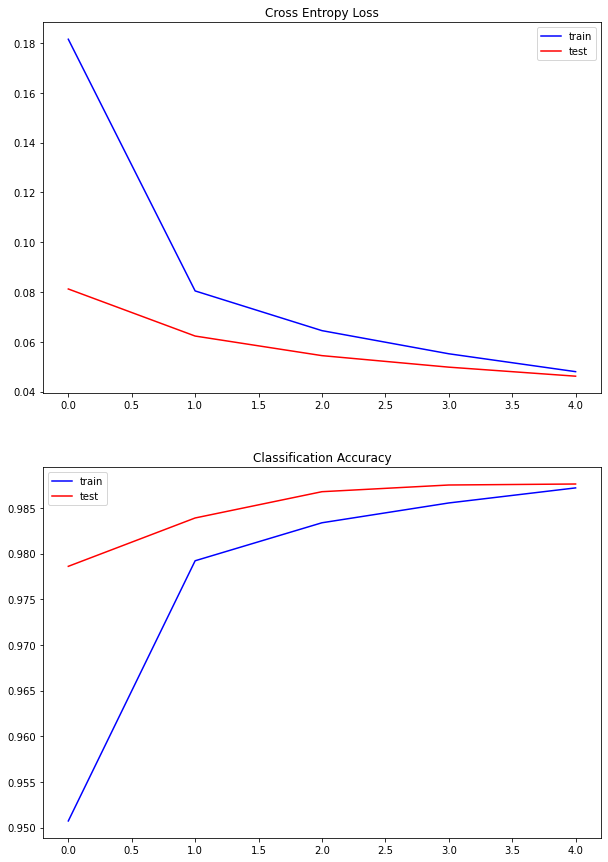

In [40]:
fig=plt.figure(figsize=(10,15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [41]:
metrics=model.evaluate(x_test,y_test)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

117/117 [==============================] - 5s 43ms/step - loss: 0.0384 - accuracy: 0.9874
Test Acuracy is : 98.74
Test Loss is : 0.04


In [42]:
model.save('Alphabet_Recognition')

INFO:tensorflow:Assets written to: Alphabet_Recognition\assets


INFO:tensorflow:Assets written to: Alphabet_Recognition\assets


In [43]:
model=tf.keras.models.load_model('Alphabet_Recognition')

In [44]:
metrics= model.evaluate(x_test,y_test)
print(metrics)
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

117/117 [==============================] - 5s 41ms/step - loss: 0.0384 - accuracy: 0.9874
[0.03837917745113373, 0.9873690009117126]
Test Acuracy is : 98.74
Test Loss is : 0.04


In [45]:
def test_images(n=225):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=model.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alpha[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alpha[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


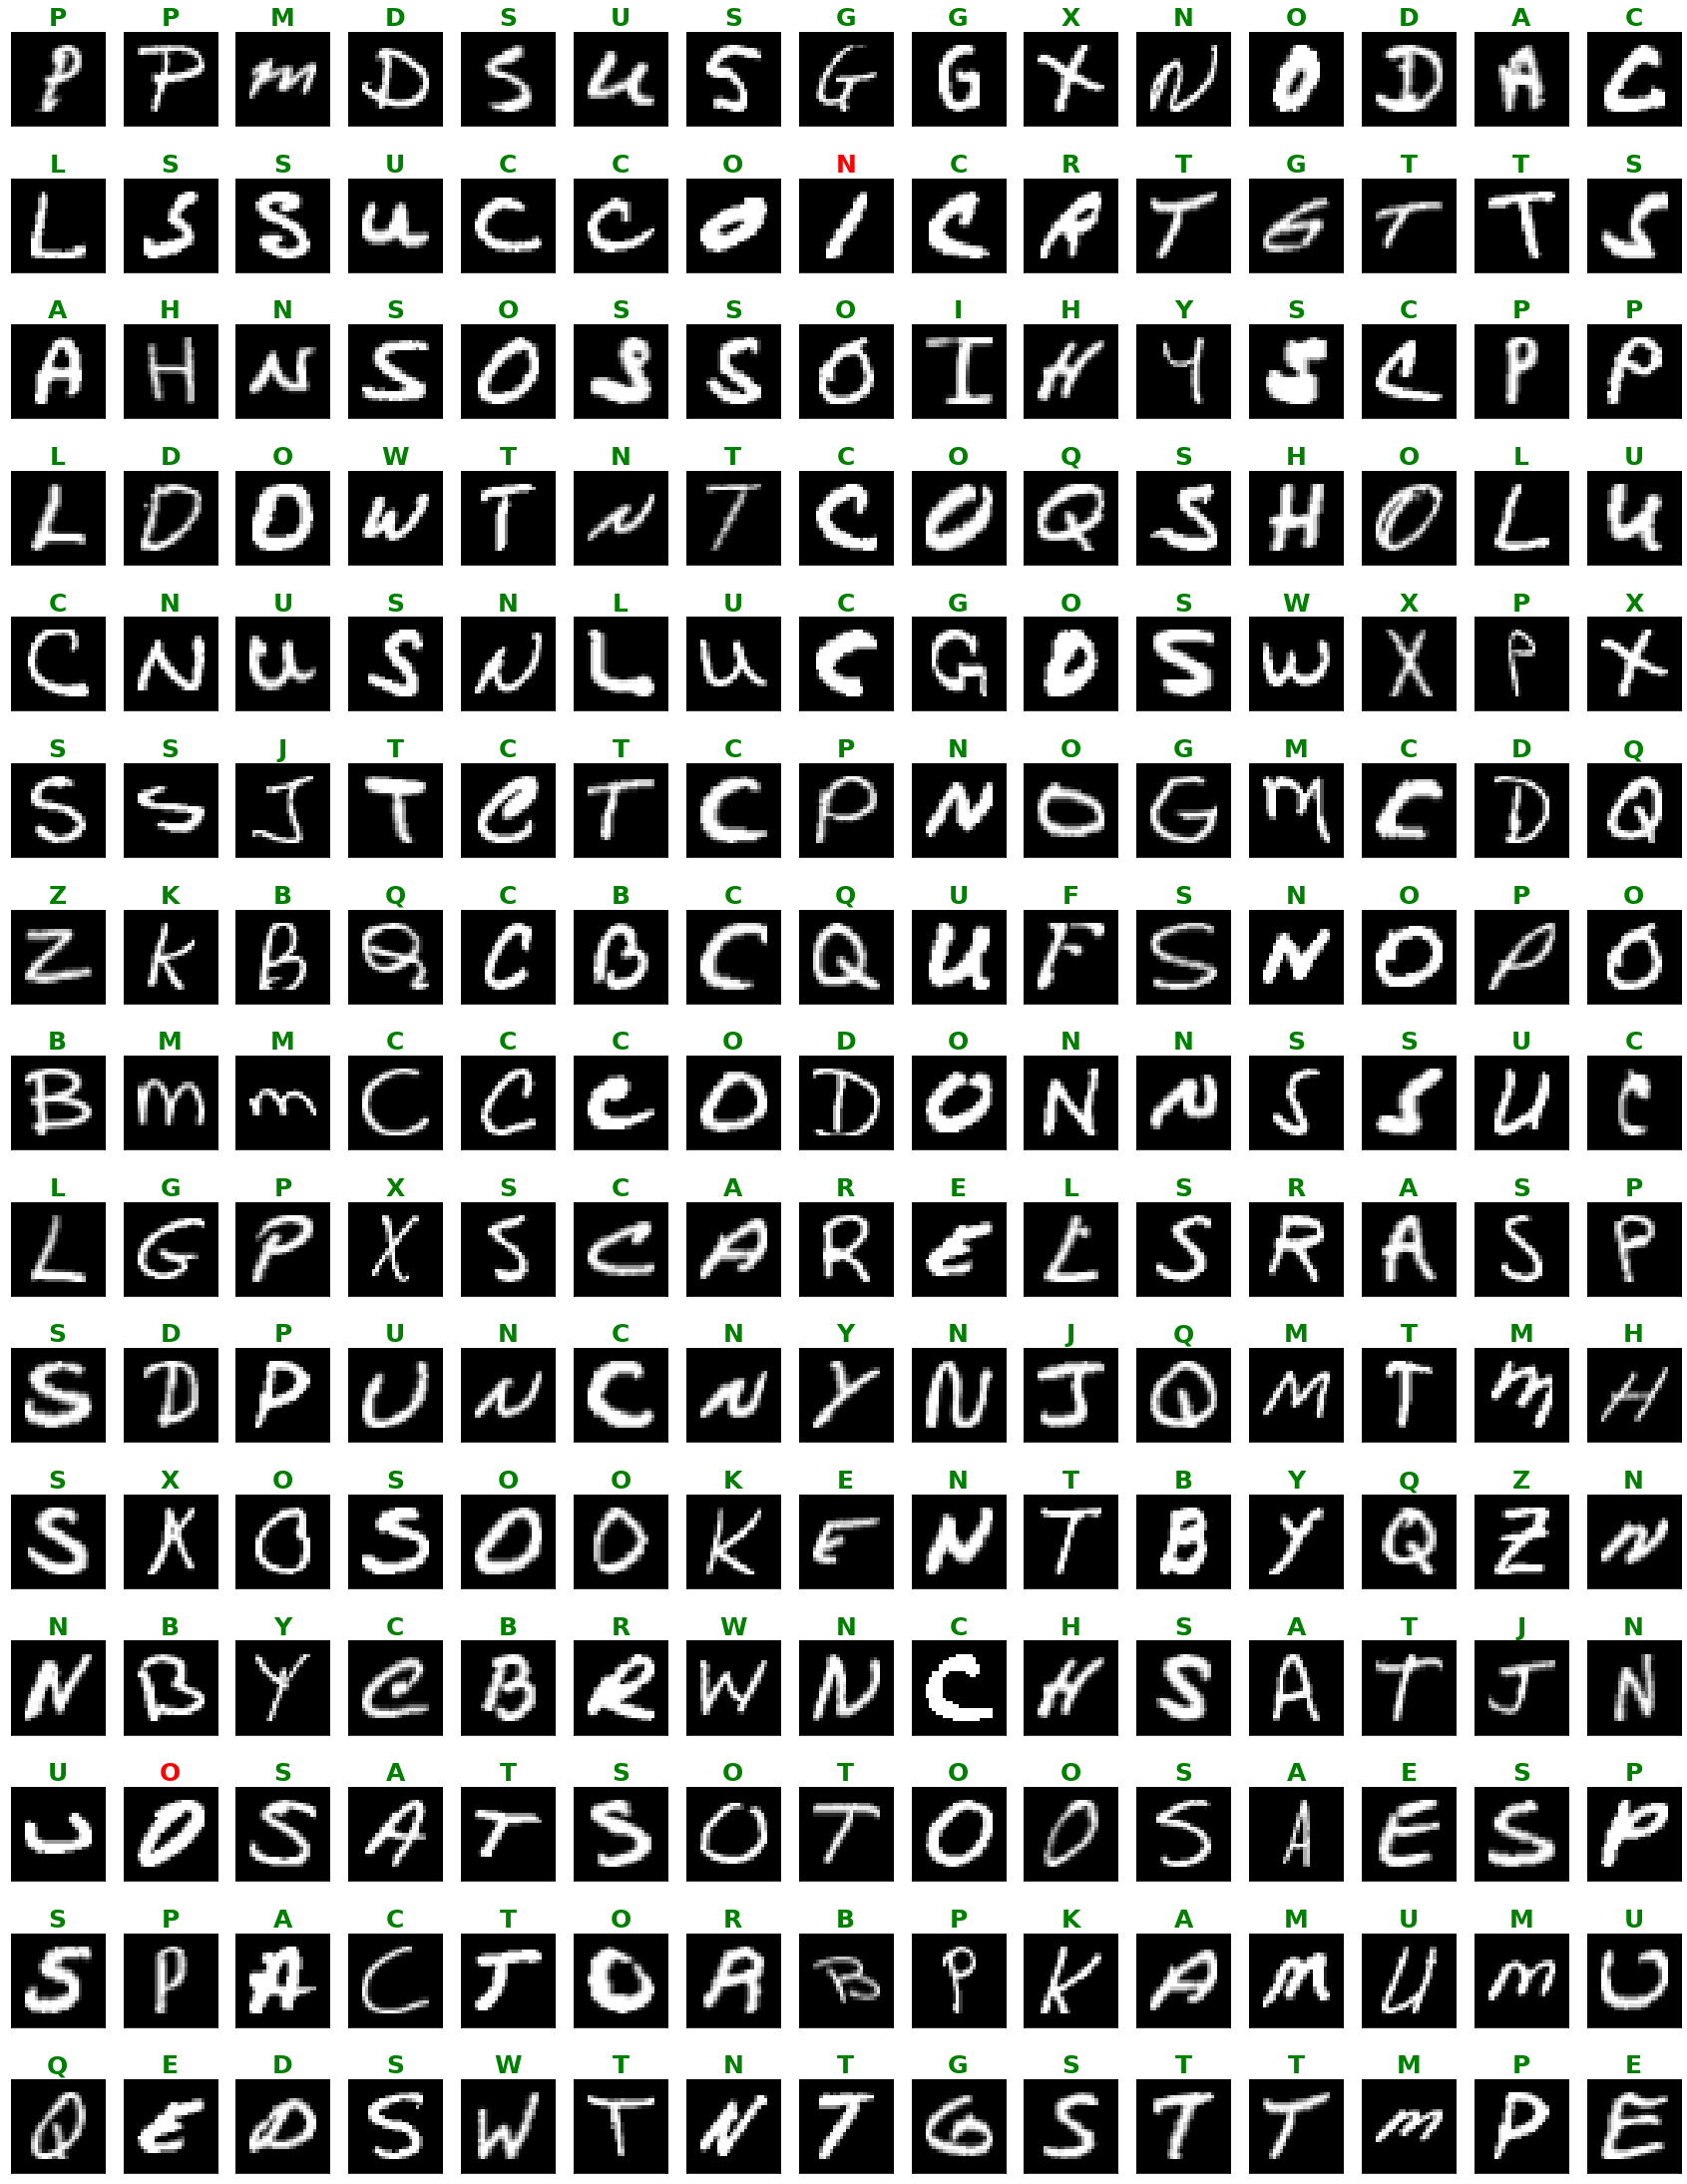

In [46]:
test_images()


In [47]:
import cv2

In [48]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')


In [49]:
def alphabet_recognize(filepath):
    image = cv2.imread(filepath)
    blur_image=cv2.medianBlur(image,7)

    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(grey,200,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,41,25)

    contours,hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    # initialize the reverse flag and sort index
    # handle if we need to sort in reverse
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
                                    key=lambda b:b[1][0], reverse=False))


    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
    plt.xticks([])
    plt.yticks([])
    plt.title("Contoured Image",color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    inp = np.array(preprocessed_digits)
    figr=plt.figure(figsize=(len(inp),4))
    i=1
    alphabets=[]
    for digit in preprocessed_digits:
        [prediction] = model.predict(digit.reshape(1, 28, 28, 1)/255.)
        pred=alpha[np.argmax(prediction)]
        alphabets.append(pred)
        figr.add_subplot(1,len(inp),i)
        i+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred,color='green',fontsize=18,fontweight="bold")
    print("The Recognized Alphabets are : " ,*alphabets)

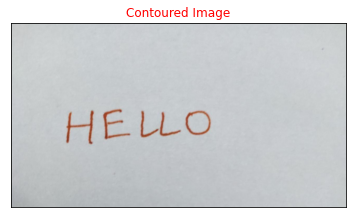

1/1 [==============================] - 0s 14ms/step
The Recognized Alphabets are :  H E L L O


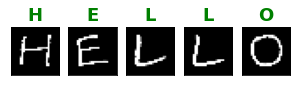

In [50]:
alphabet_recognize('image1.jpg')

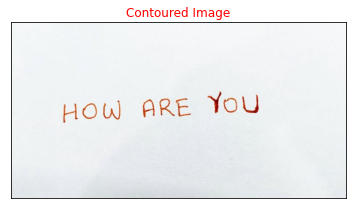

1/1 [==============================] - 0s 23ms/step
The Recognized Alphabets are :  H O W A R E Y O U


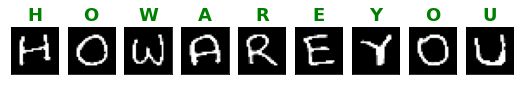

In [51]:
alphabet_recognize('image2.jpg')

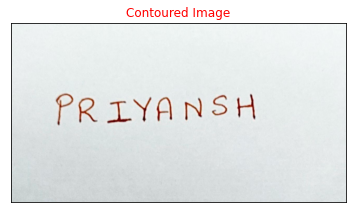

1/1 [==============================] - 0s 25ms/step
The Recognized Alphabets are :  P R I Y A N S H


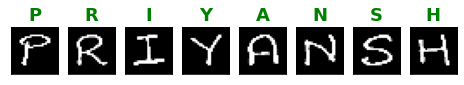

In [52]:
alphabet_recognize('image3.jpg')

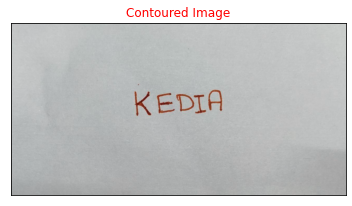

1/1 [==============================] - 0s 31ms/step
The Recognized Alphabets are :  K E D I A


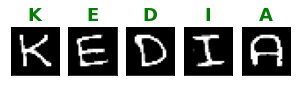

In [53]:
alphabet_recognize('image4.jpg')

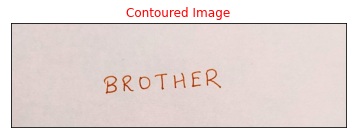

1/1 [==============================] - 0s 26ms/step
The Recognized Alphabets are :  B R O T H E R


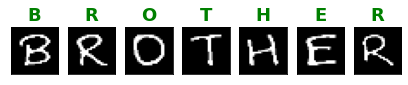

In [54]:
alphabet_recognize('image5.jpg')

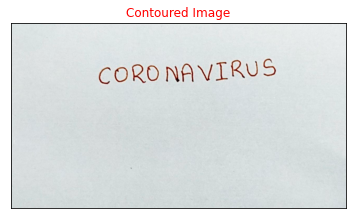

1/1 [==============================] - 0s 14ms/step
The Recognized Alphabets are :  C O R O N A V I R U S


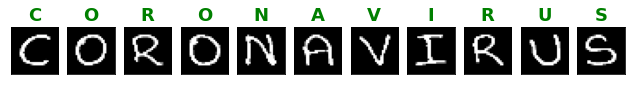

In [55]:
alphabet_recognize('image6.jpg')